In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_train = np.loadtxt('train_X.csv', delimiter = ',')
y_train = np.loadtxt('train_label.csv', delimiter = ',')
x_test = np.loadtxt('test_X.csv', delimiter = ',',)
y_test = np.loadtxt('test_label.csv', delimiter = ',')

In [5]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1000, 784), (350, 784), (1000, 10), (350, 10))

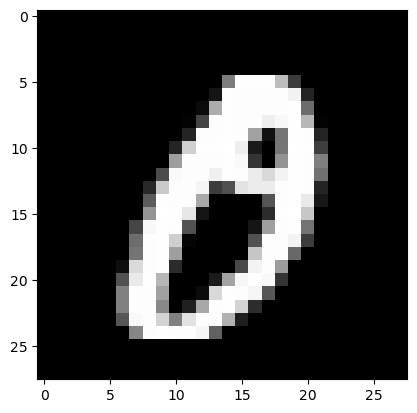

In [7]:
index = np.random.randint(0,x_train.shape[0])
plt.imshow(x_train[index,:].reshape(28,28),cmap = 'grey')
plt.show()

In [9]:
def initialize_parameters(n_x,n_h,n_y):
    np.random.seed(42)
    w1 = np.random.randn(n_x,n_h)*0.003
    b1 = np.zeros((1,n_h))
    w2 = np.random.randn(n_h,n_y)*0.003
    b2 = np.zeros((1,n_y))
    return w1,b1,w2,b2

In [11]:
def relu(z):
    return np.maximum(0,z)
def tanh(z):
    return np.tanh(z)
def softmax(z):
    expz = np.exp(z)
    return expz/np.sum(expz,axis = 1,keepdims = True)

In [13]:
def relu_derivative(z):
    return np.where(z>0,1,0)
def tanh_derivative(z):
    return 1 - np.power(np.tanh(z),2)

In [15]:
def cost(y,a2):
    bce = np.mean(-(y*np.log(a2)))
    return bce

In [17]:
def forward_propagation(x,w1,b1,w2,b2):
    z1 = np.dot(x,w1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1,w2) + b2
    a2 = softmax(z2)
    return z1,a1,z2,a2

In [19]:
def backward_propagation(x,y,z1,a1,a2,w2):
    m = x.shape[0]
    dz2 = a2 - y
    dw2 = np.dot(a1.T,dz2)/m
    db2 = np.sum(dz2,axis = 0,keepdims = True)/m

    da1 = np.dot(dz2,w2.T)
    dz1 = da1 * relu_derivative(z1)
    dw1 = np.dot(x.T,dz1)/m
    db1 = np.sum(dz1,axis = 0,keepdims = True)/m
    return dw1,db1,dw2,db2

In [21]:
def update_parameters(w1,b1,w2,b2,dw1,db1,dw2,db2,learning_rate):
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    return w1,b1,w2,b2

In [23]:
def train_model(x,y,n_h,learning_rate,epochs):
    n_x = x.shape[1]
    n_y = y.shape[1]
    costs = []
    w1,b1,w2,b2 = initialize_parameters(n_x,n_h,n_y)
    for i in range(1,epochs+1):
        z1,a1,z2,a2 = forward_propagation(x,w1,b1,w2,b2)
        costf = cost(y,a2)
        costs.append(costf)
        dw1,db1,dw2,db2 = backward_propagation(x,y,z1,a1,a2,w2)
        w1,b1,w2,b2 = update_parameters(w1,b1,w2,b2,dw1,db1,dw2,db2,learning_rate)
        if i == 1 or i%50 == 0:
            print('Cost after ',i,' iterations = ',costf)
    return costs,w1,b1,w2,b2

In [25]:
costs,w1,b1,w2,b2 = train_model(x_train,y_train,n_h = 100,learning_rate = 0.001,epochs = 500)

Cost after  1  iterations =  0.23123227196520674
Cost after  50  iterations =  0.0465491619804933
Cost after  100  iterations =  0.02604228249040858
Cost after  150  iterations =  0.01714936297078195
Cost after  200  iterations =  0.01185159784861562
Cost after  250  iterations =  0.008418645783616159
Cost after  300  iterations =  0.00617632182279991
Cost after  350  iterations =  0.004704159216019505
Cost after  400  iterations =  0.003707521127727884
Cost after  450  iterations =  0.0030110751809234748
Cost after  500  iterations =  0.002506385464874808


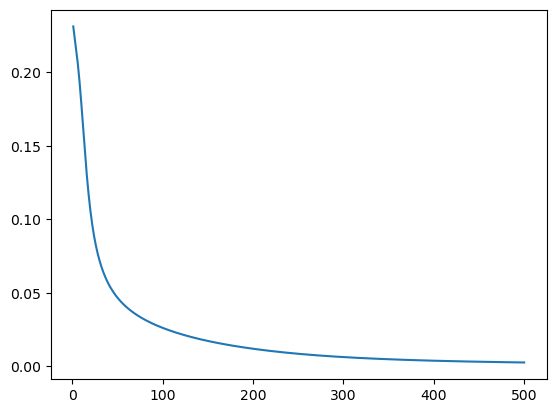

In [27]:
t = np.arange(1,501)
plt.plot(t,costs)
plt.show()

In [33]:
def accuracy(x,y,w1,b1,w2,b2):
    z1,a1,z2,a2 = forward_propagation(x,w1,b1,w2,b2)
    a_out = np.argmax(a2,1,keepdims = True)
    y_out = np.argmax(y,1,keepdims = True)
    acc = np.mean(a_out == y_out)*100
    return acc

In [37]:
print('Train Accuracy = ',accuracy(x_train,y_train,w1,b1,w2,b2),'%')
print('Test Accuracy = ',round(accuracy(x_test,y_test,w1,b1,w2,b2),2),'%')

Train Accuracy =  100.0 %
Test Accuracy =  86.57 %


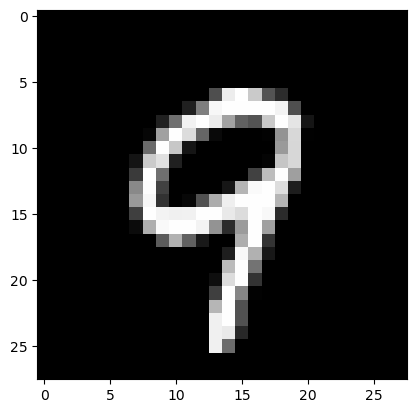

Our Model Says:  9


In [60]:
index = np.random.randint(0,x_test.shape[0])
plt.imshow(x_test[index,:].reshape(28,28),cmap = 'grey')
plt.show()

z1,a1,z2,a2 = forward_propagation(x_test[index,:].reshape(1,x_test.shape[1]),w1,b1,w2,b2)
a_out = np.argmax(a2,1,keepdims = True)
print('Our Model Says: ',a_out[0][0])